# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'being processed (with the city number and city name).


In [22]:
query_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=imperial" + "&q="

tempList = []
humList = [] 
cloudList = []
latList = []
longList = []
windList = []
countryList = []
cityList = []
dateList = []


for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        print(f'Gathering Data for {city} with ID {response["id"]}')
        tempList.append(response["main"]["temp"])
        humList.append(response["main"]["humidity"])
        cloudList.append(response["clouds"]["all"])
        latList.append(response["coord"]["lat"])
        longList.append(response["coord"]["lon"])
        windList.append(response["wind"]["speed"])
        countryList.append(response["sys"]["country"])
        cityList.append(response["name"])
        dateList.append(response["dt"])
                           
    except KeyError as e:
        print(f"City Not Found: {city}")
    continue



Gathering Data for vao with ID 2137773
Gathering Data for ribeira grande with ID 3372707
Gathering Data for port alfred with ID 964432
Gathering Data for cape town with ID 3369157
Gathering Data for kutum with ID 371745
Gathering Data for ushuaia with ID 3833367
Gathering Data for giyani with ID 1001860
Gathering Data for udachnyy with ID 2014624
City Not Found: taolanaro
Gathering Data for ilulissat with ID 3423146
Gathering Data for grootfontein with ID 3357114
Gathering Data for springdale with ID 4132093
Gathering Data for kavaratti with ID 1267390
Gathering Data for komsomolskiy with ID 1513491
Gathering Data for abalak with ID 1512223
City Not Found: kollumerland
Gathering Data for san cristobal with ID 3628473
City Not Found: tsihombe
City Not Found: grand river south east
City Not Found: belushya guba
Gathering Data for saint-philippe with ID 935215
Gathering Data for east london with ID 1006984
Gathering Data for katsuura with ID 2112309
Gathering Data for tungawan with ID 168

Gathering Data for fortuna with ID 5563839
Gathering Data for rio gallegos with ID 3838859
Gathering Data for cidreira with ID 3466165
Gathering Data for ahuimanu with ID 5856516
Gathering Data for los llanos de aridane with ID 2514651
Gathering Data for sindgi with ID 1256214
Gathering Data for abu samrah with ID 172515
Gathering Data for benghazi with ID 88319
Gathering Data for salalah with ID 286621
Gathering Data for narsaq with ID 3421719
Gathering Data for wanaka with ID 2184707
Gathering Data for jinchang with ID 1805733
Gathering Data for pokrovsk with ID 704422
Gathering Data for aykhal with ID 2027296
Gathering Data for eureka with ID 5563397
Gathering Data for touros with ID 3386213
Gathering Data for brookhaven with ID 4419500
Gathering Data for ugoofaaru with ID 1337619
Gathering Data for zyryanka with ID 2119283
Gathering Data for nikolskoye with ID 546105
Gathering Data for hermanus with ID 3366880
Gathering Data for bugama with ID 2324433
Gathering Data for okhotsk wit

Gathering Data for guerrero negro with ID 4021858
Gathering Data for karratha with ID 6620339
Gathering Data for kovernino with ID 543494
Gathering Data for comodoro rivadavia with ID 3860443
City Not Found: sansai
Gathering Data for cap malheureux with ID 934649
Gathering Data for mackay with ID 2159220
Gathering Data for atar with ID 2381334
Gathering Data for kolomak with ID 705403
Gathering Data for virginia beach with ID 4791259
Gathering Data for ayr with ID 2656708
Gathering Data for atlantic city with ID 4500546
Gathering Data for turayf with ID 101312
Gathering Data for mahibadhoo with ID 1337605
Gathering Data for saint-francois with ID 2980080
City Not Found: palabuhanratu
Gathering Data for guatire with ID 3639898
Gathering Data for kalmunai with ID 1242110
Gathering Data for peterhead with ID 2640351
Gathering Data for launceston with ID 2160517
Gathering Data for atherton with ID 2656847
Gathering Data for kazerun with ID 128321
Gathering Data for yenagoa with ID 2318123


Gathering Data for tingo maria with ID 3691348
Gathering Data for bonthe with ID 2409914
Gathering Data for radom with ID 760778
Gathering Data for caravelas with ID 3466980
Gathering Data for linxia with ID 1803331
Gathering Data for hlotse with ID 932698
Gathering Data for lara with ID 2160560
Gathering Data for havelock with ID 4470244
Gathering Data for ayan with ID 2027316
Gathering Data for laguna with ID 5364271
Gathering Data for disna with ID 629055
Gathering Data for onokhoy with ID 2018436
Gathering Data for yining with ID 1786538
Gathering Data for sistranda with ID 3139597
City Not Found: liminangcong


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
response = requests.get(query_url + "Boston").json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 42.36, 'lon': -71.06},
 'dt': 1591573930,
 'id': 4930956,
 'main': {'feels_like': 59.58,
          'humidity': 82,
          'pressure': 1013,
          'temp': 60.06,
          'temp_max': 63,
          'temp_min': 57},
 'name': 'Boston',
 'sys': {'country': 'US',
         'id': 3486,
         'sunrise': 1591520869,
         'sunset': 1591575532,
         'type': 1},
 'timezone': -14400,
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 3.36}}


In [24]:
weather_dict = {"City": cityList, 
                "Country": countryList, 
                "Temp": tempList, 
                "Humidity": humList, 
                "Lat": latList, 
                "Long": longList, 
                "Cloud": cloudList, 
                "Wind": windList, 
                "Date": dateList
                }
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv("Output/weather_data.csv")
weather_df.head()

,City,Country,Temp,Humidity,Lat,Long,Cloud,Wind,Date
0,Vao,NC,71.58,68,-22.67,167.48,100,14.88,1591579101
1,Ribeira Grande,PT,62.31,70,38.52,-28.70,13,7.92,1591579101
2,Port Alfred,ZA,60.01,97,-33.59,26.89,0,1.01,1591579101
3,Cape Town,ZA,54.21,100,-33.93,18.42,75,9.17,1591579102
4,Kutum,SD,70.30,18,14.20,24.67,0,6.60,1591579102


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs Temperature')

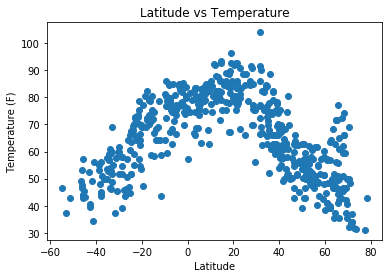

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Temperature")

## Latitude vs. Humidity Plot

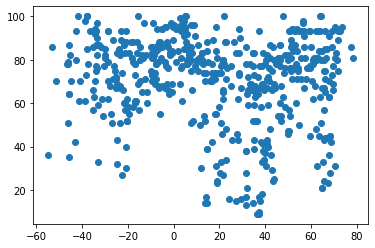

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"])

## Latitude vs. Cloudiness Plot

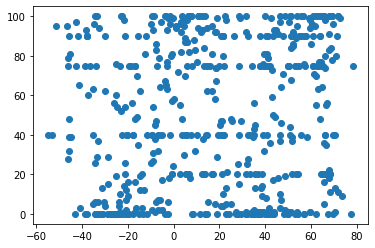

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Cloud"])

## Latitude vs. Wind Speed Plot

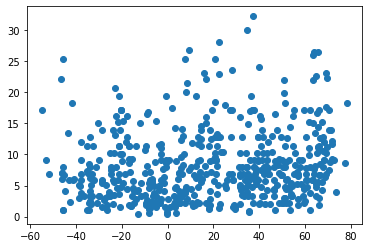

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Wind"])

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression